<a href="https://colab.research.google.com/github/Jawad-Flahi/FacebookProphetTimeSeriesForecasting/blob/main/Laptoptrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import  Dependencies

In [30]:
# import libraries 
import pandas as pd # Import Pandas 
import numpy as np # Import Numpy 
import matplotlib.pyplot as plt # Import matplotlib for data visualization
import random
import seaborn as sns
from fbprophet import Prophet


## Read in Data

In [31]:
df = pd.read_csv("/content/multiTimeline.csv") #loading the csv file

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      261 non-null    object
 1   y       261 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


 ### Changing ds column to datetime

In [33]:
df['ds'] = pd.to_datetime(df['ds']) 

#### Train  Model

In [34]:
pf = Prophet()
pf.fit(df) #fitting the model

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### Forecasting

In [35]:
future = pf.make_future_dataframe(200) #extending the dataframe to 200 days to forcast the trend
future.tail()

,ds
456,2022-07-03
457,2022-07-04
458,2022-07-05
459,2022-07-06
460,2022-07-07


In [36]:
forecast = pf.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() #yhat_upper and yhat_lower are uncertainty intervals and yhat forecast

,ds,yhat,yhat_lower,yhat_upper
456,2022-07-03,14.632587,4.838968,23.906698
457,2022-07-04,14.558168,4.074636,23.423693
458,2022-07-05,14.459597,5.434727,24.110525
459,2022-07-06,14.339551,4.889569,24.193074
460,2022-07-07,14.201281,4.596087,23.876440


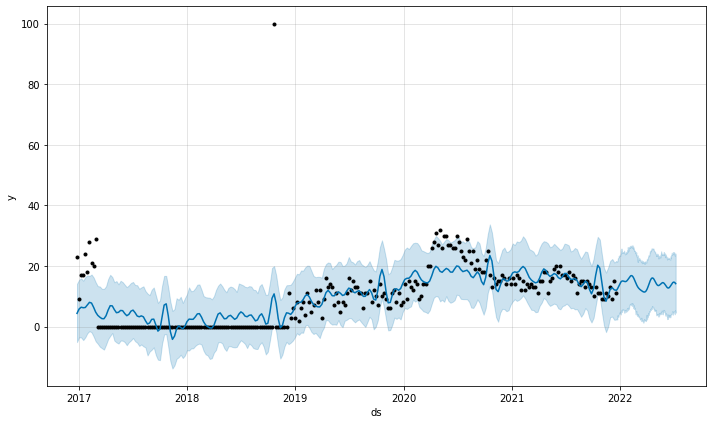

In [37]:
fig1 = pf.plot(forecast) #black dot points are actual data points and blue line is pridicted

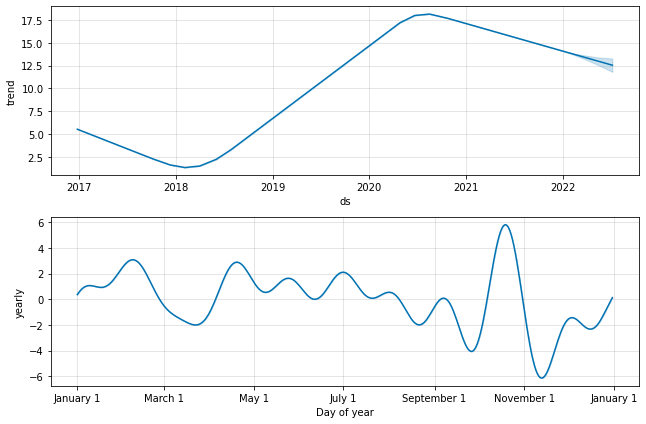

In [38]:
fig2 = pf.plot_components(forecast)


In [39]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(pf, forecast)

In [40]:
plot_components_plotly(pf, forecast)
